<a href="https://colab.research.google.com/github/yurigalindo/DaemonPS/blob/main/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1: funds analysis

In [1]:
import warnings
warnings.filterwarnings("ignore") #This ignores all warnings, useful for generating a readable notebook.
#Warnings should not be ignored when developing since they may contain useful info.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, let's import the dataset and take a look

In [2]:
funds = pd.read_csv('funds.csv')
print(funds) 

            date                                               name       share
0     2020-02-27  DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENT...    0.999245
1     2020-02-27  KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FU...    3.619358
2     2020-02-27  MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO...    3.087837
3     2020-02-27  VISIA ZARATHUSTRA FUNDO DE INVESTIMENTO EM COT...    3.668623
4     2020-02-27  RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTA...  151.726673
...          ...                                                ...         ...
3342  2021-05-31  CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS D...    1.238264
3343  2021-05-31  CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULT...    1.431536
3344  2021-05-31  CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS ...    1.270007
3345  2021-05-31  MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO M...    0.994555
3346  2021-05-31  KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS D...    0.981442

[3347 rows x 3 columns]


Now we want to calculate the total return and volatility for each fund. In order to do so it's useful to convert from shares to daily logarithmic return. 

The logarithmic return for each day is the log of the division of the day's share value by the value of the previous day.

The first day of each fund will have undefined log returns, so we can assign zero (equivalent to no price change).

In [3]:
funds['log_returns']=funds.groupby('name').transform(lambda x: np.log(x/x.shift()))
#The group by function groups the rows by name, and transform calculates the log return 
#inside each group by dividing by the previous element with the shift method.
#Values are added to a new column called log_returns
funds.fillna(0,inplace=True)
#Fills Nan values with 0 (first days)

Based on the log returns we can compute the annualized return and volatility.

For the annualized return, we can use the average daily log return, multiply by the number of trading days in a year, then exponentiate and subtract by one. If we want the result in percentages we can multiply by 100.

The volatility is the standard deviation of the log returns, that can be annualized by multiplying by the square root of the trading days in a year (source in [this link](https://web.archive.org/web/20120330224816/http://www.lfrankcabrera.com/calc-hist-vol.pdf) and more discussion in [wikipedia](https://en.wikipedia.org/wiki/Volatility_(finance)#Mathematical_definition)).

The sharpe ratio can be obtained by dividing the annualized log return by the volatility.

## a) Descriptive statistics

In [4]:
TRADING_DAYS = 252
print('Annualized Returns in Percentage')
funds.groupby('name')['log_returns'].apply(lambda x: (np.exp(np.mean(x)*TRADING_DAYS)-1)*100)

Annualized Returns in Percentage


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       -7.488748
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       5.408019
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    12.383609
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              26.802327
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO            3.577470
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       -1.892958
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                 -0.430233
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO               8.108632
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      3.865451
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     3.26

In [5]:
print('Annualized Volatility')
funds.groupby('name')['log_returns'].apply(lambda x: np.std(x)*TRADING_DAYS**0.5)

Annualized Volatility


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       0.092294
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      0.042013
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    0.097130
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              0.138921
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO           0.036780
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       0.083336
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                 0.038619
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO              0.156420
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     0.082009
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO    0.055263
VISIA

In [6]:
print('Annualized Sharpe Ratios')
funds.groupby('name')['log_returns'].apply(lambda x: (TRADING_DAYS**0.5*np.mean(x))/(np.std(x)) )

Annualized Sharpe Ratios


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      -0.843390
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      1.253627
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    1.201976
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              1.709314
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO           0.955676
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      -0.229324
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                -0.111646
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO              0.498444
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     0.462466
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO    0.582058
VISIA

For the rolling statistics, we can use the Rolling Method provided by numpy.

We must define a time window that defines how many days we will take into account for the rolling statistics.


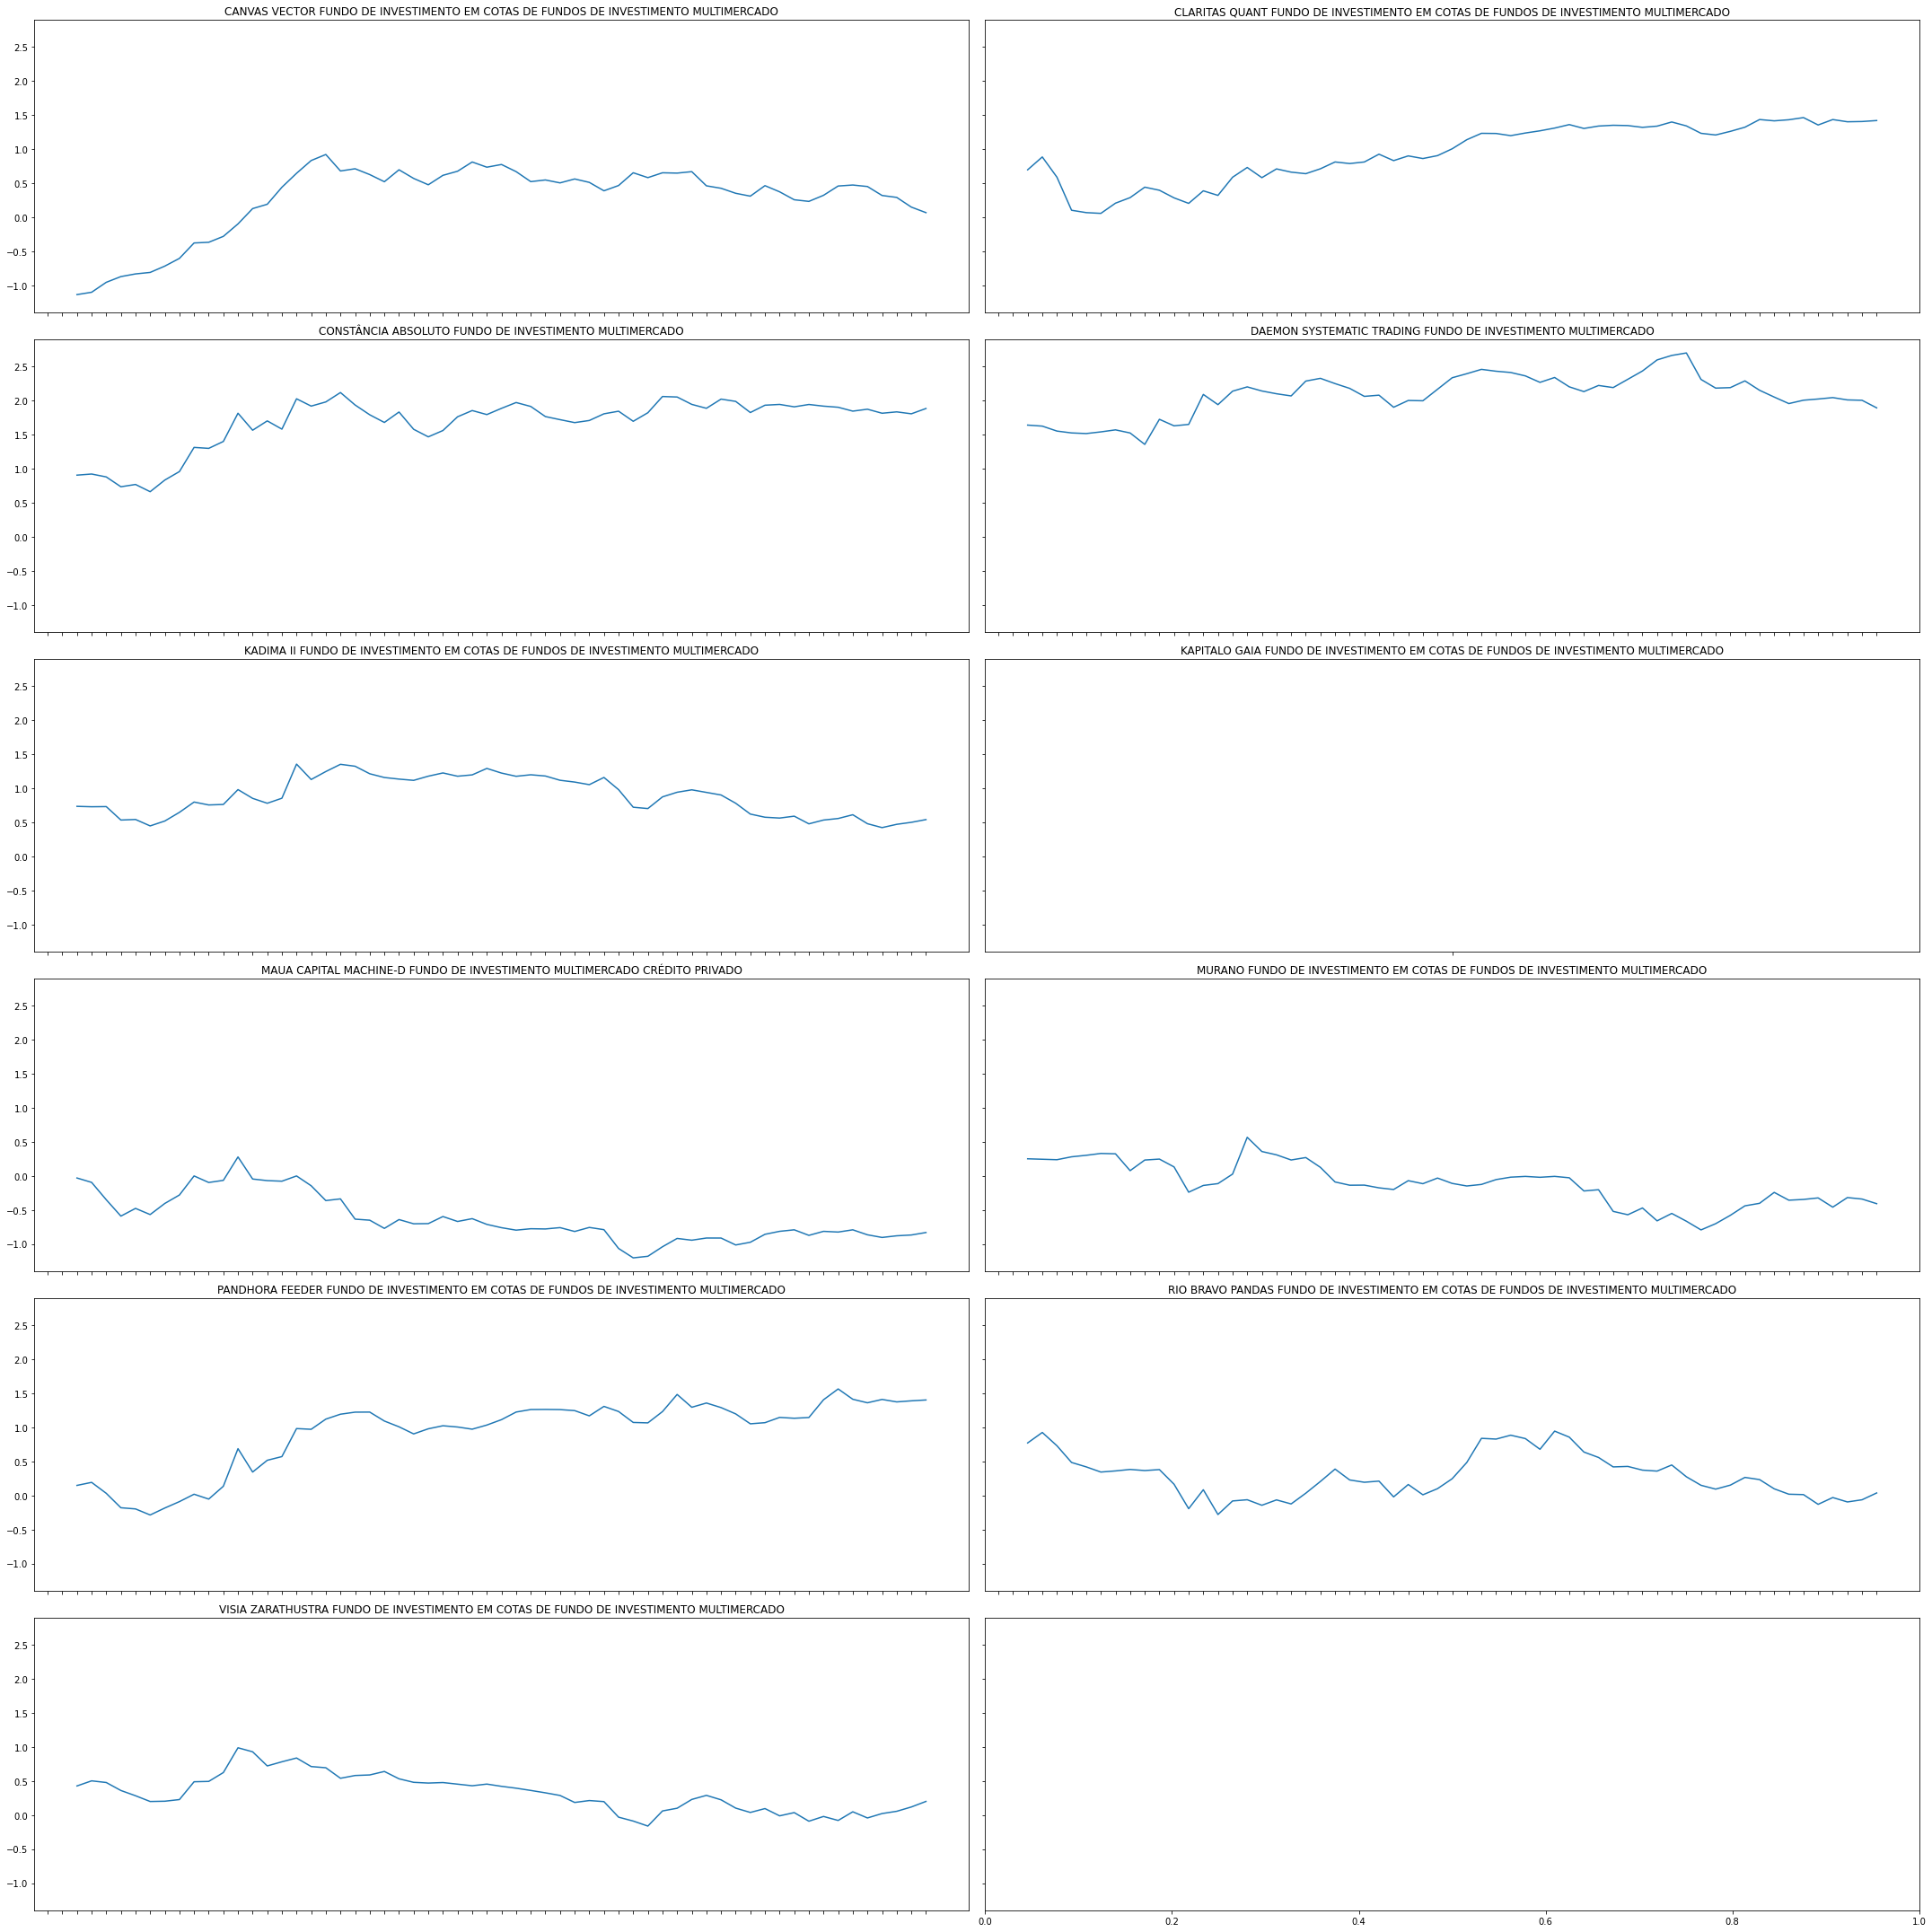

In [7]:
TIME_WINDOW = 252
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: TRADING_DAYS**0.5*np.mean(x)/(np.std(x)))
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
plt.tight_layout()

One of the funds doesn't have enough historical data to plot rolling statistics with that time window, let's find out why

In [8]:
funds.groupby('name').count()

,date,share,log_returns
name,,,
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO,310,310,310
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO,310,310,310
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,247,247,247
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,310,310,310
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310


We can reduce the time window to 6 months in order to plot all funds. We can maintain a shared X axis to better compare the performance of the funds.

## b) Graphical Statistics

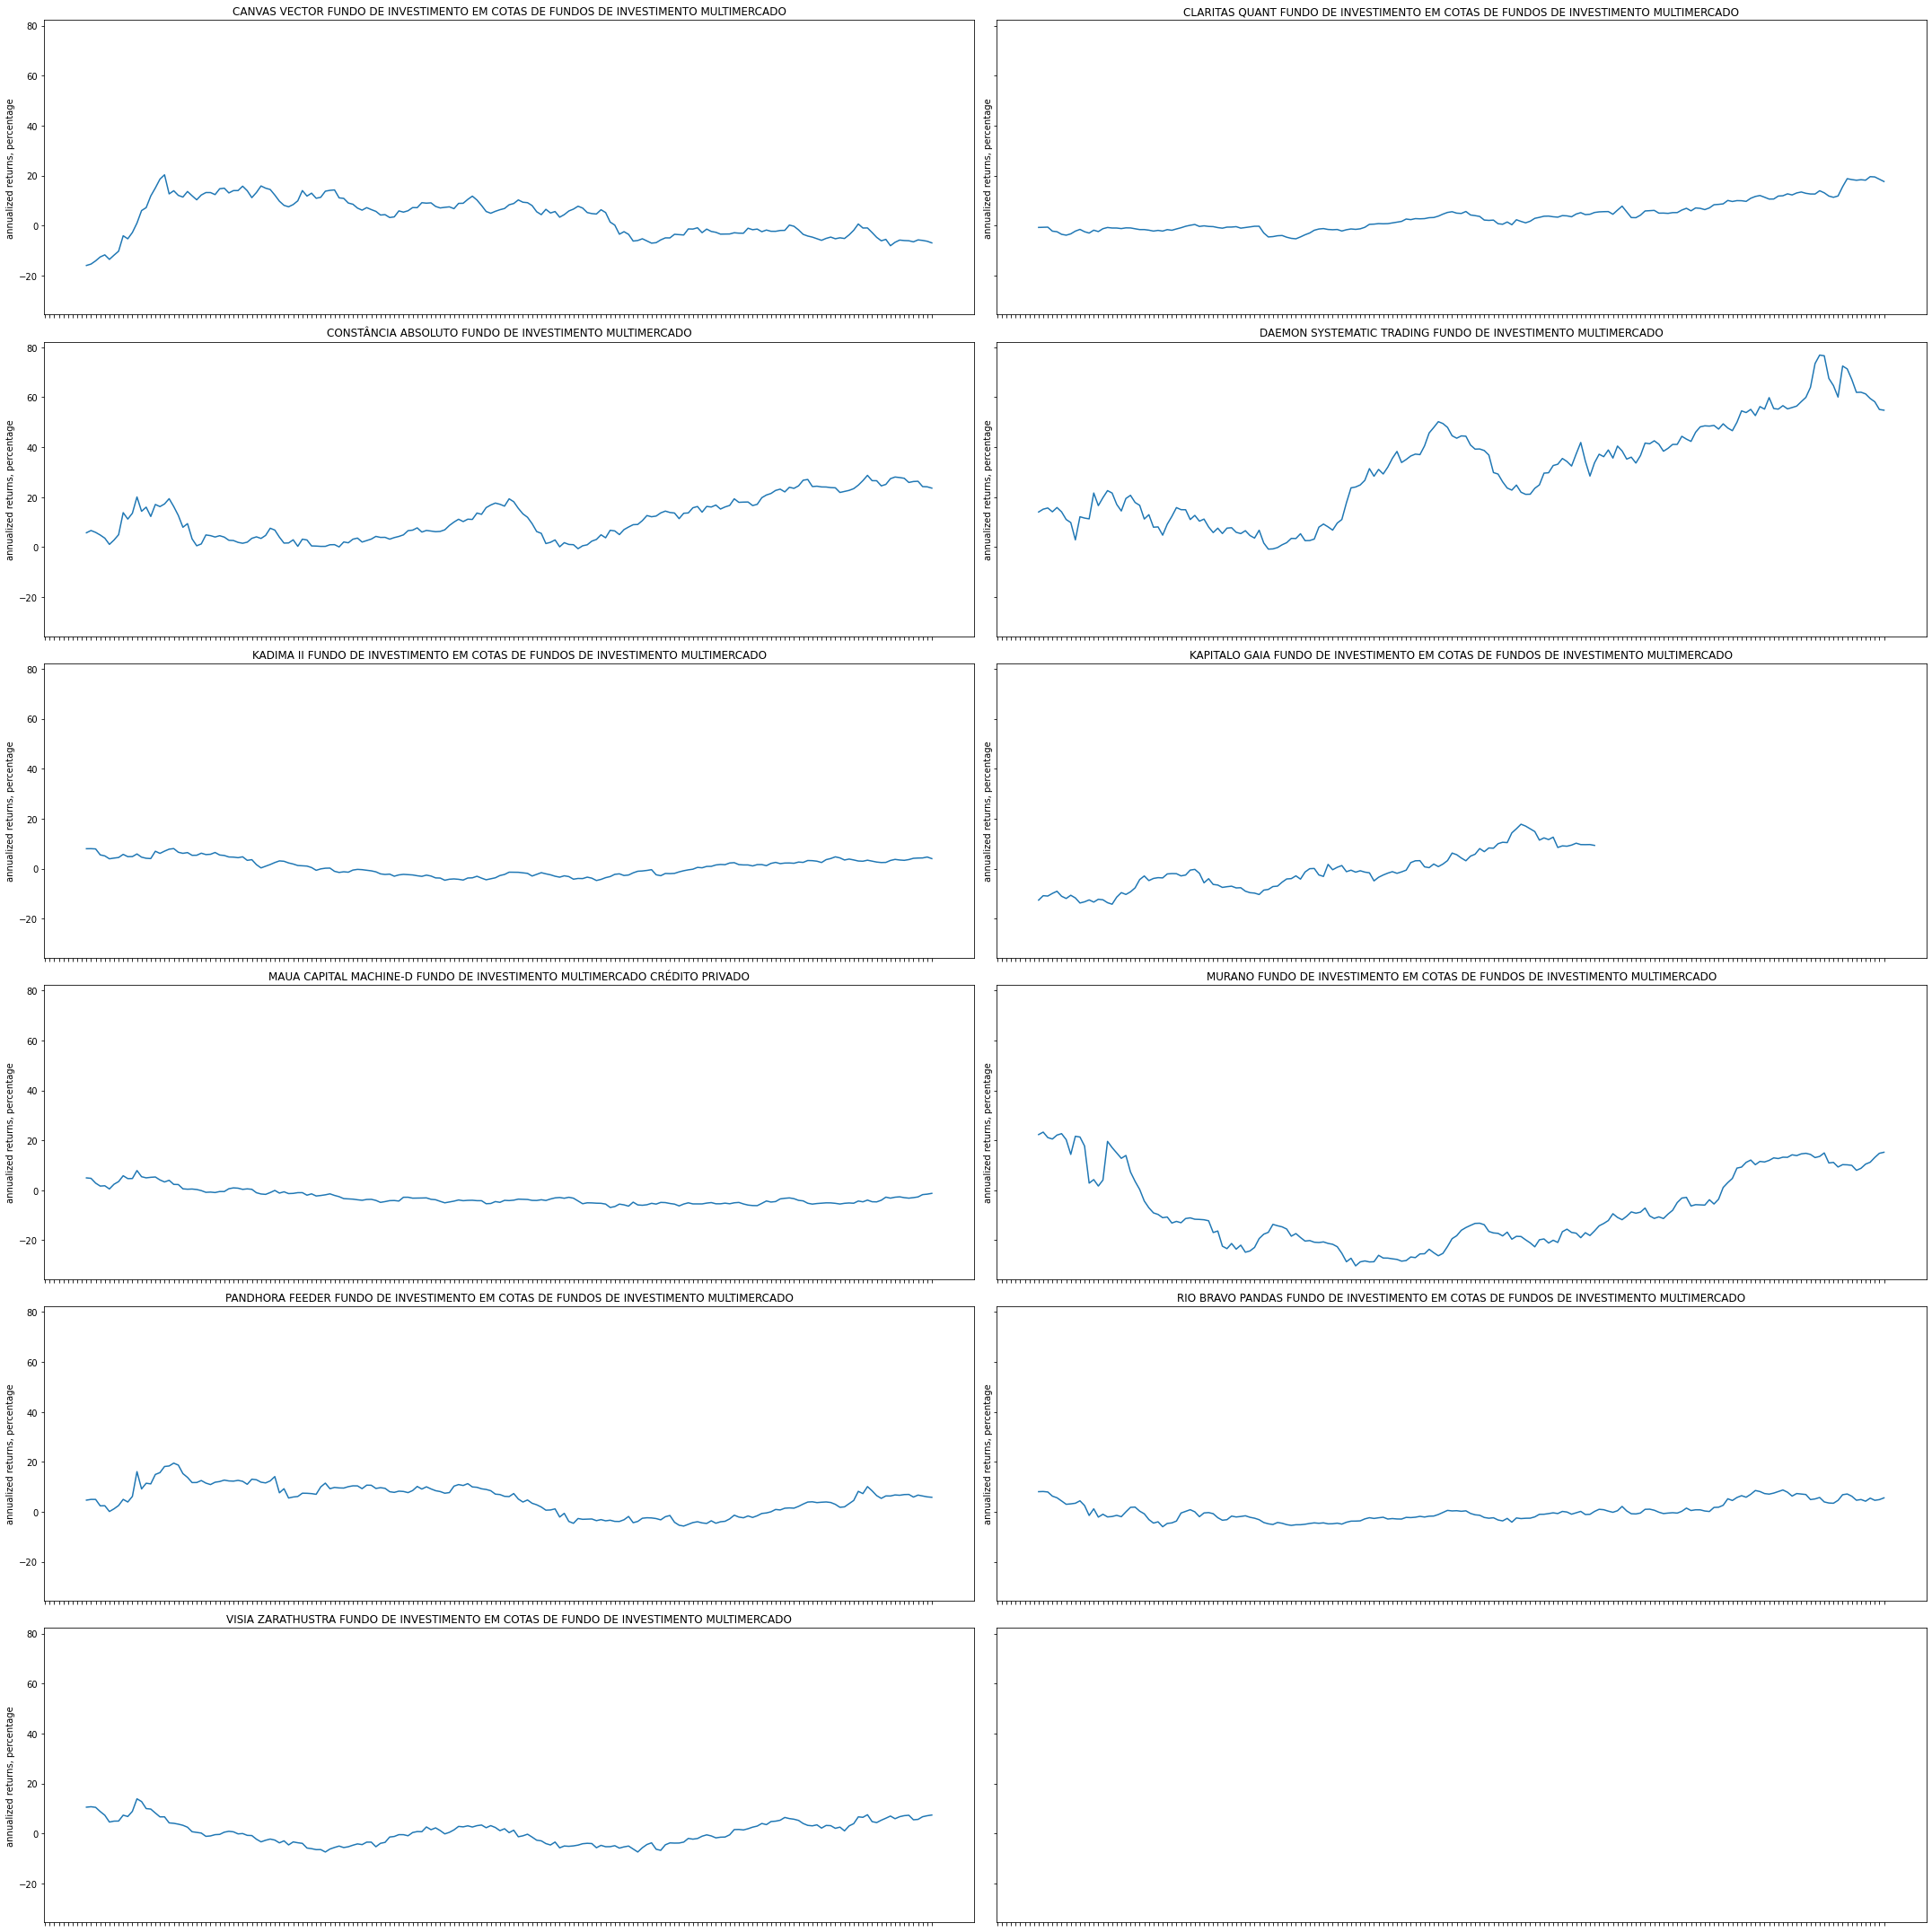

In [11]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: (np.exp(x.mean()*TRADING_DAYS)-1)*100)
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('annualized returns, percentage')
plt.tight_layout()

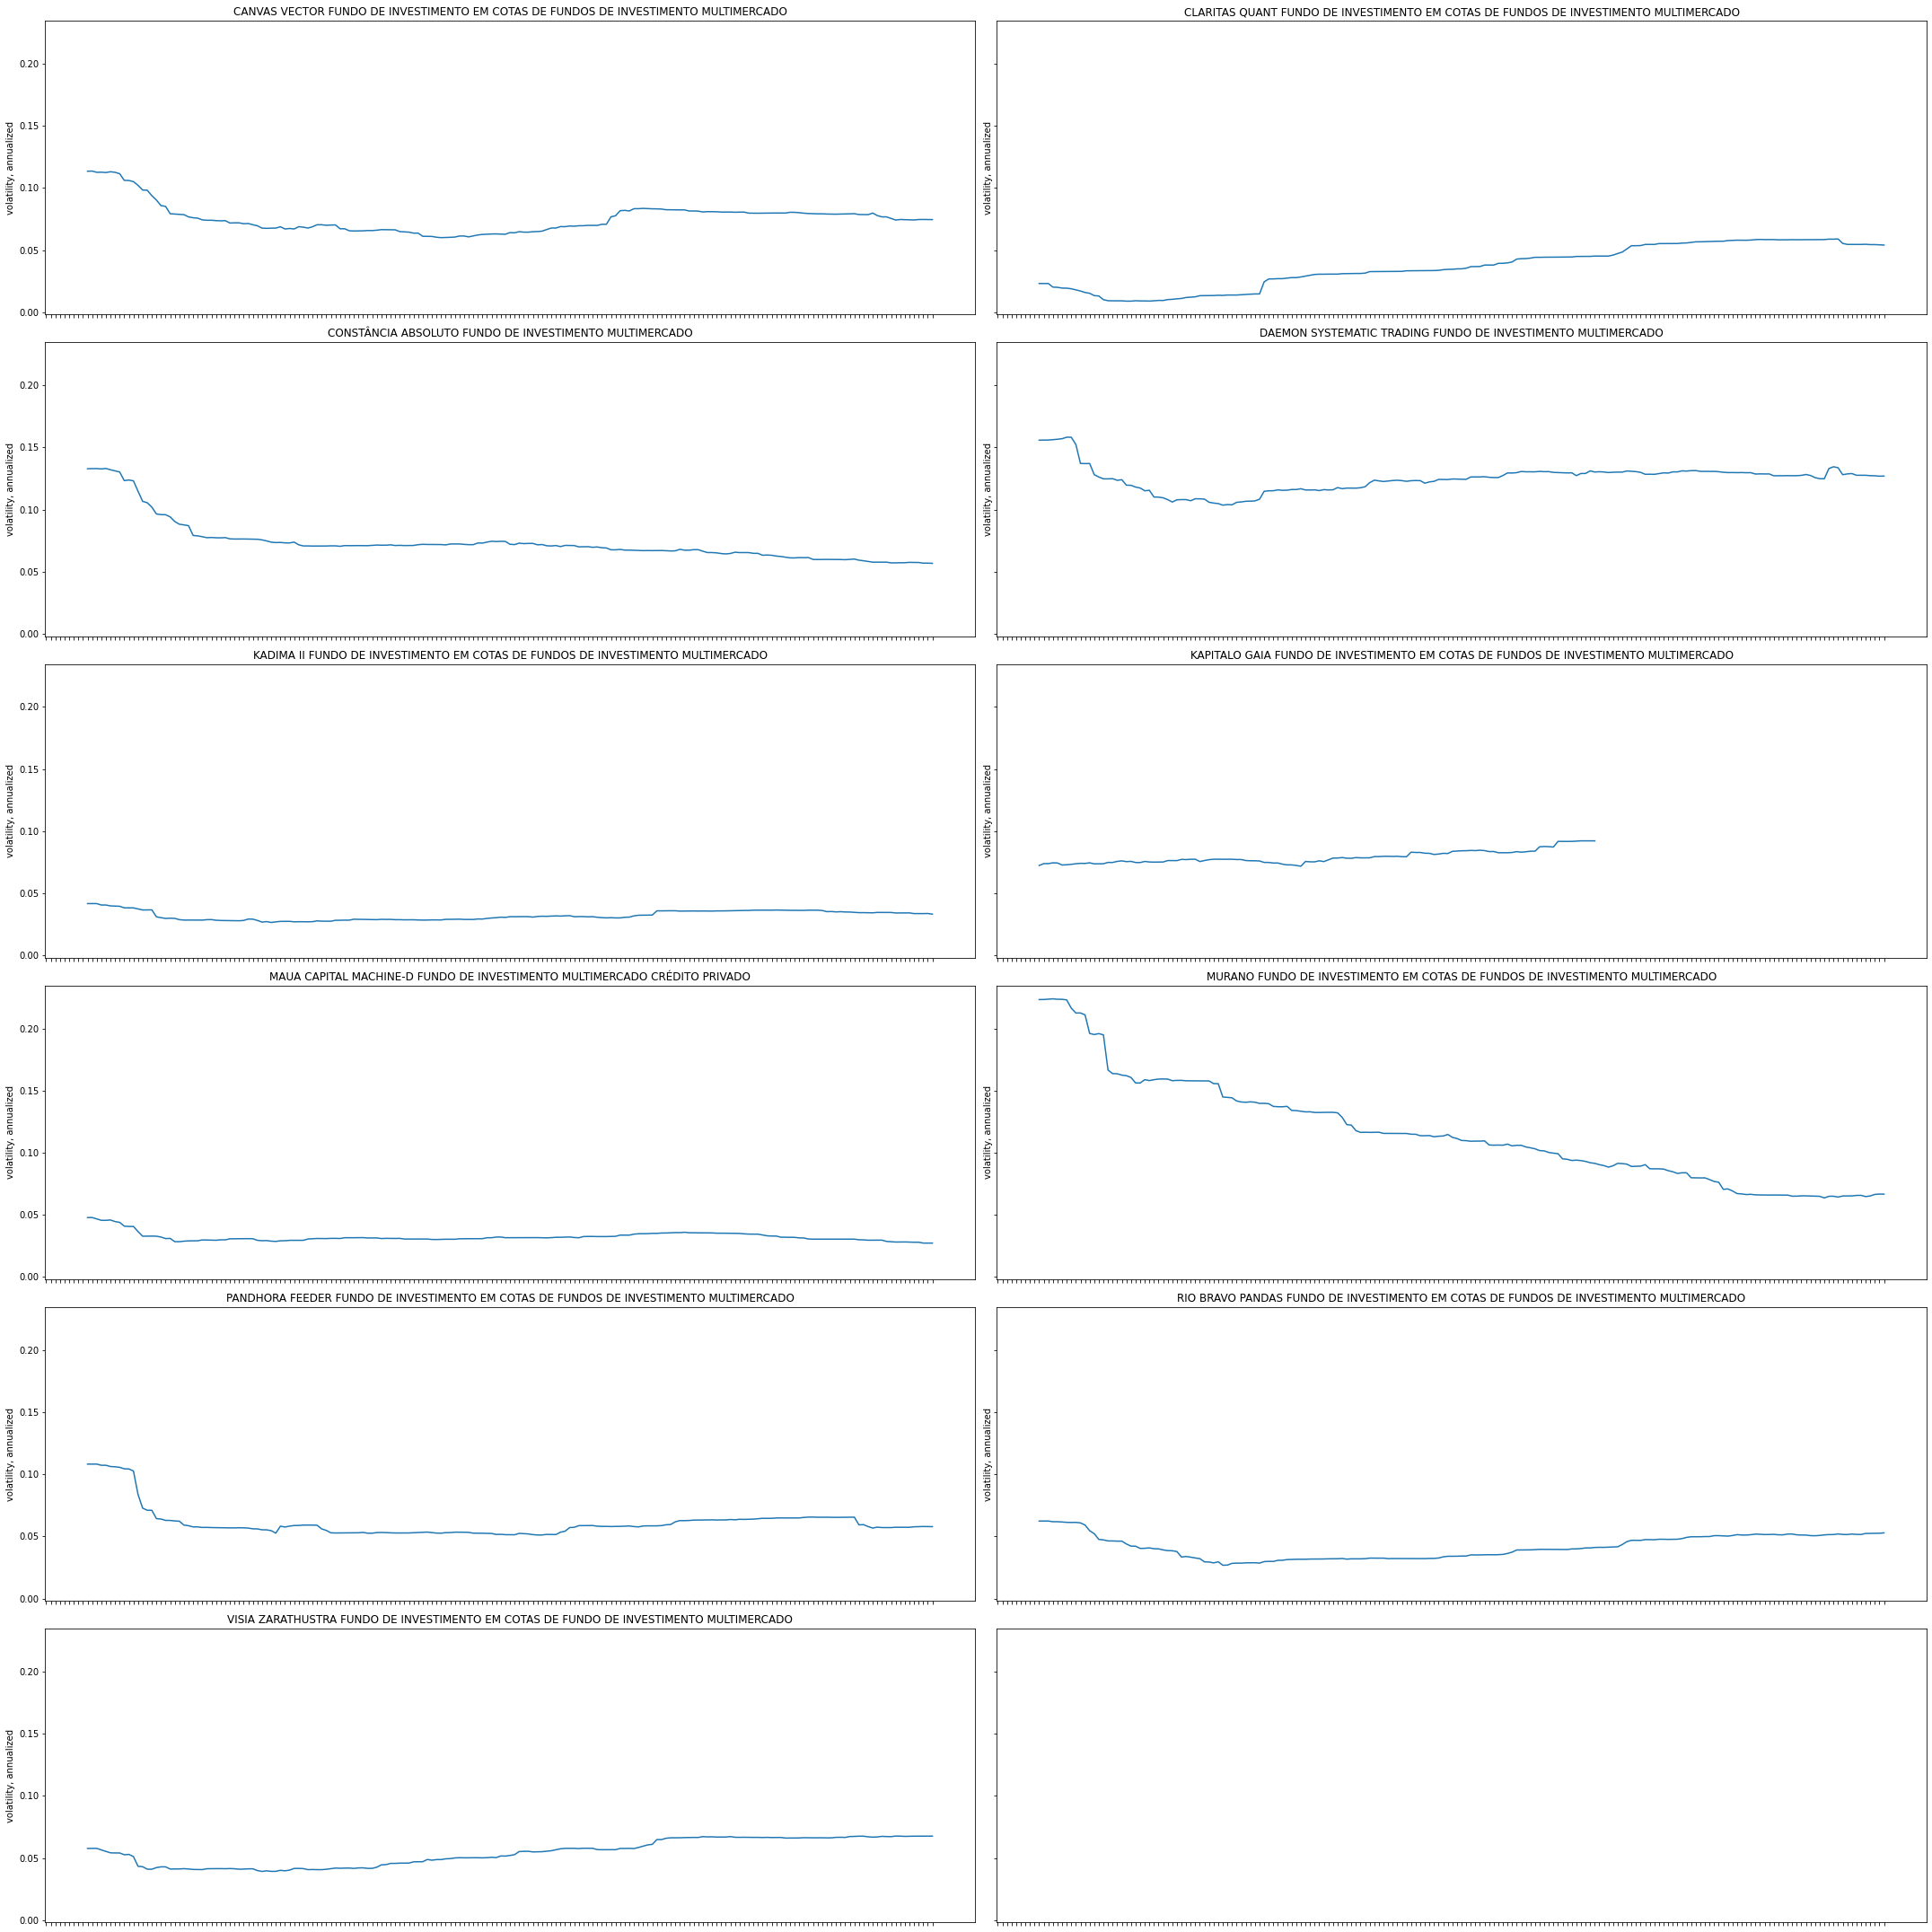

In [10]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: np.std(x)*TRADING_DAYS**0.5)
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('volatility, annualized')
plt.tight_layout()

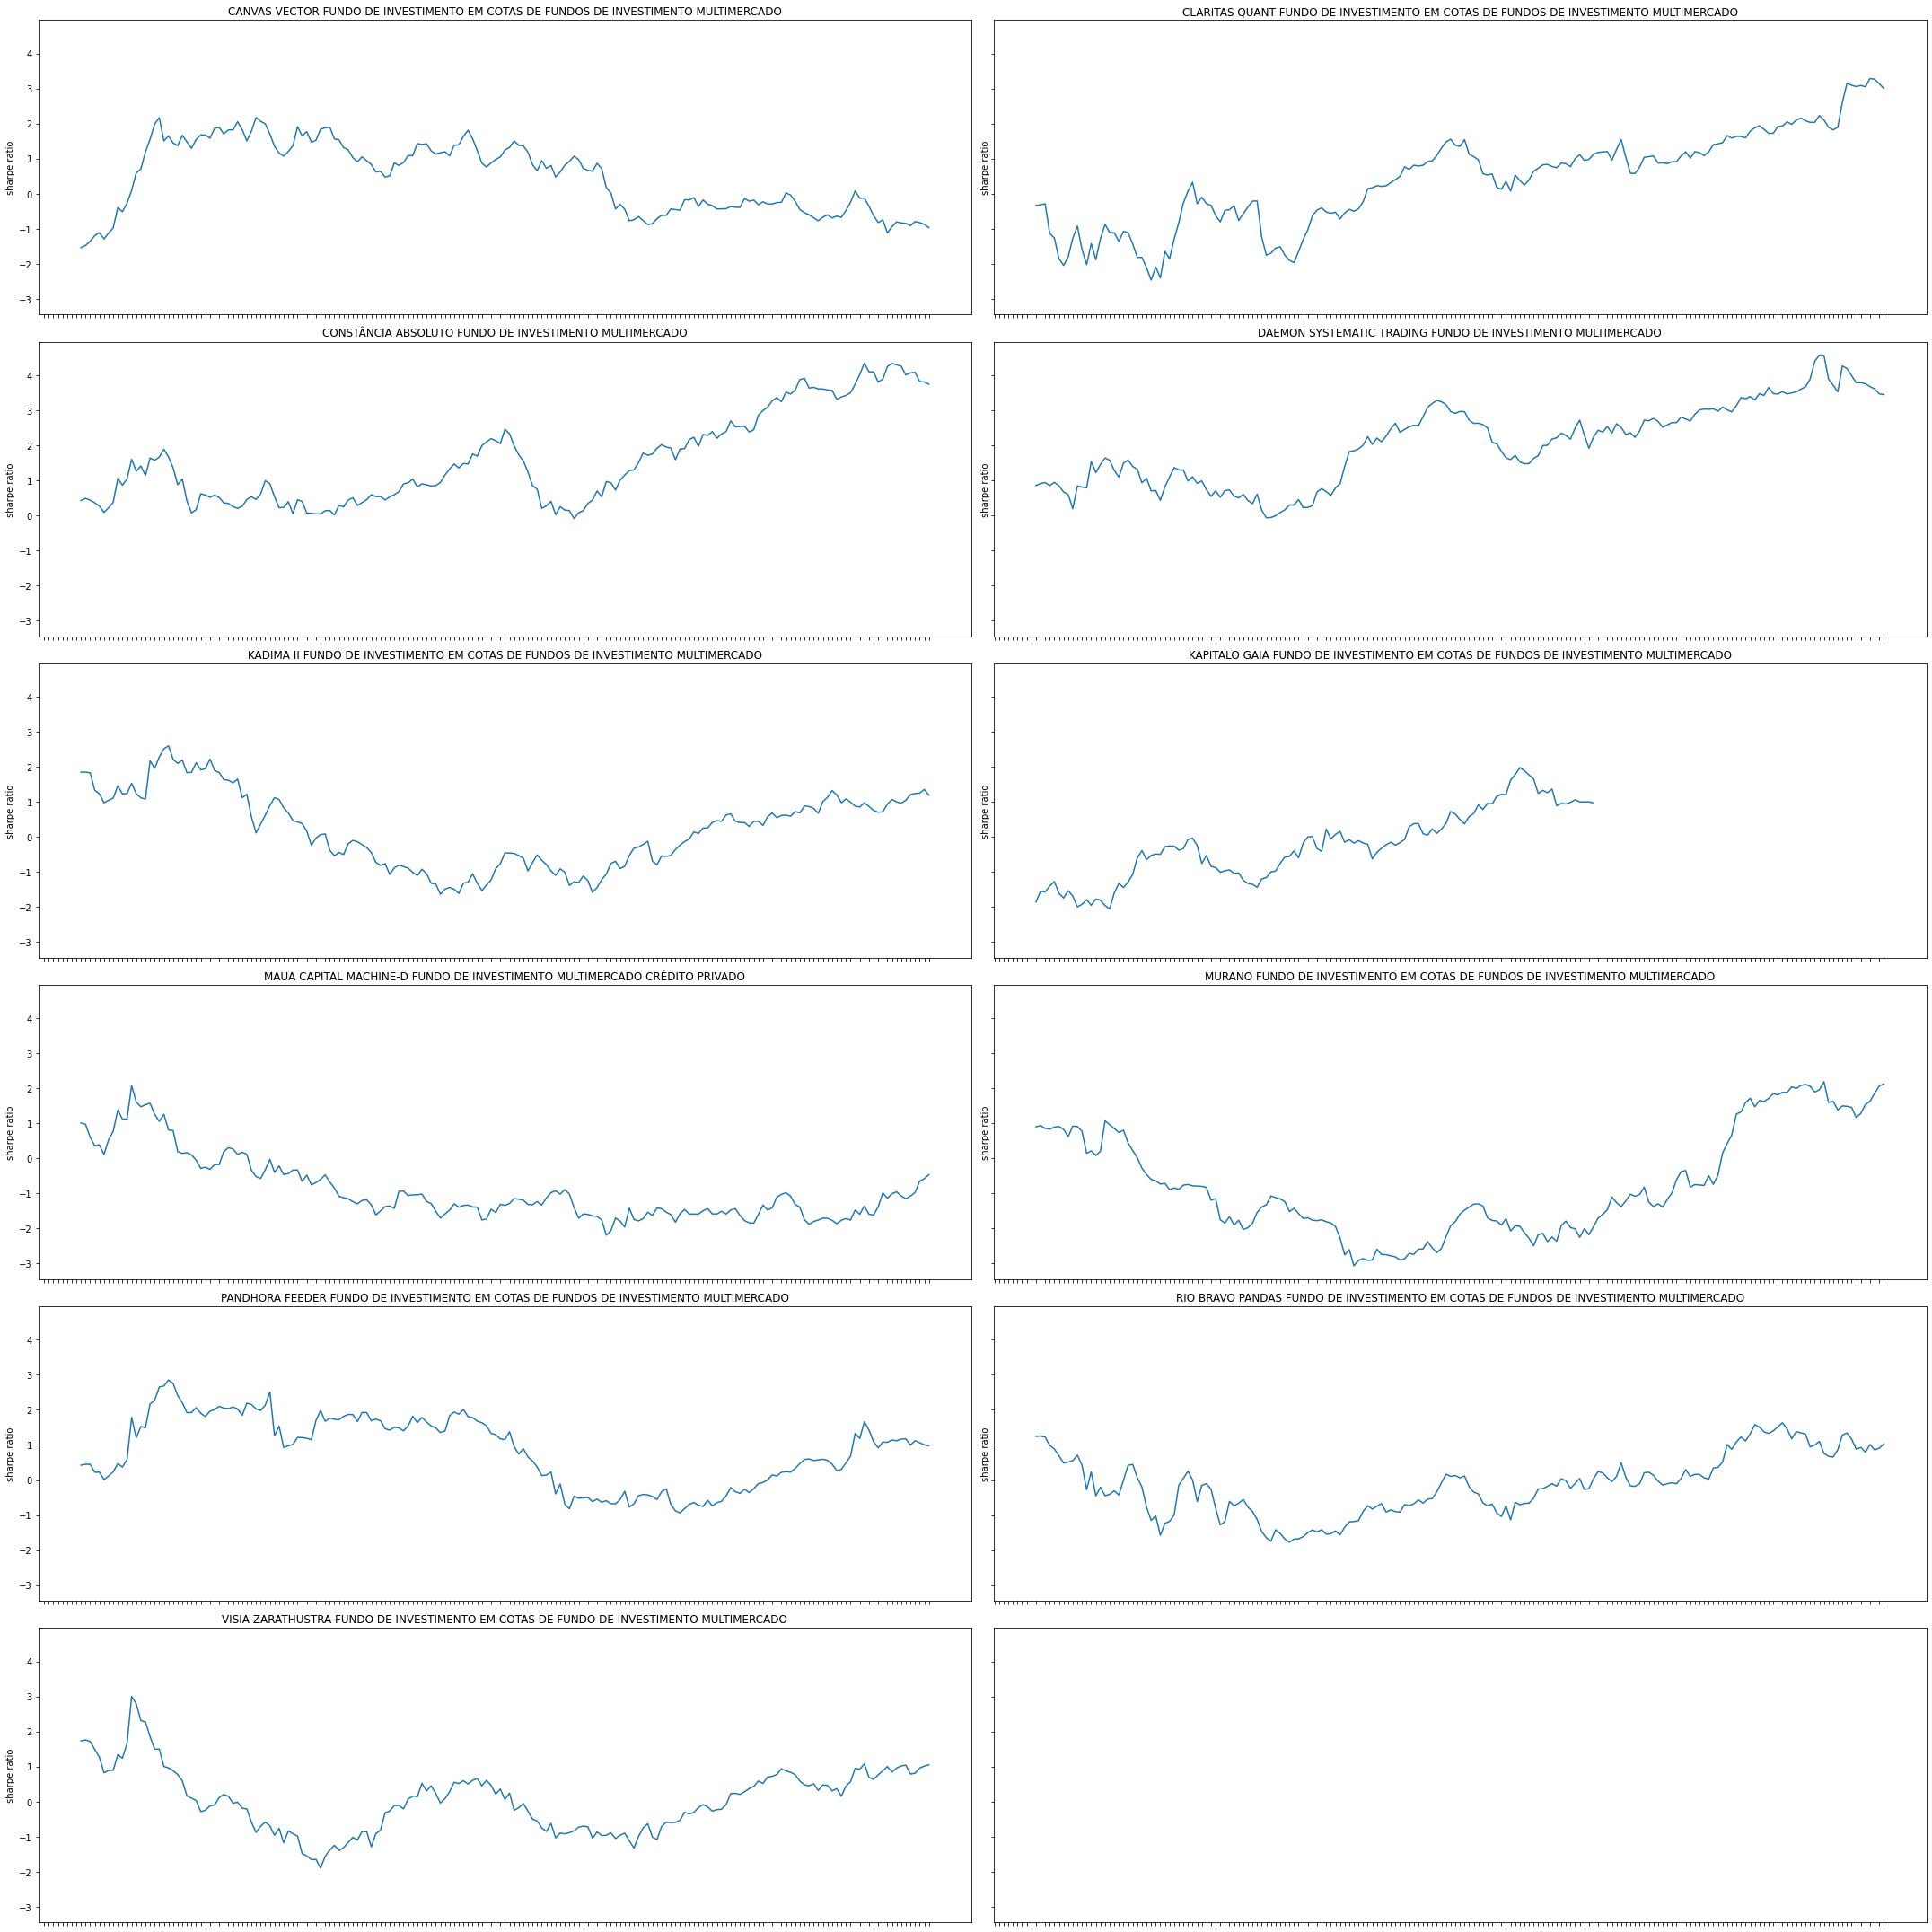

In [12]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: TRADING_DAYS**0.5*np.mean(x)/(np.std(x)))
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('sharpe ratio')
plt.tight_layout()